<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-IcaData-object" data-toc-modified-id="Load-IcaData-object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load IcaData object</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bar plots</a></span><ul class="toc-item"><li><span><a href="#Plot-Gene-Expression" data-toc-modified-id="Plot-Gene-Expression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Gene Expression</a></span></li><li><span><a href="#Plot-iModulon-Activities" data-toc-modified-id="Plot-iModulon-Activities-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot iModulon Activities</a></span></li><li><span><a href="#Plot-sample-metadata" data-toc-modified-id="Plot-sample-metadata-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot sample metadata</a></span></li></ul></li><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatterplots</a></span><ul class="toc-item"><li><span><a href="#Plot-gene-weights" data-toc-modified-id="Plot-gene-weights-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot gene weights</a></span></li><li><span><a href="#Compare-two-iModulon-activities" data-toc-modified-id="Compare-two-iModulon-activities-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compare two iModulon activities</a></span></li><li><span><a href="#Compare-two-gene-expression-profiles" data-toc-modified-id="Compare-two-gene-expression-profiles-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compare two gene expression profiles</a></span></li><li><span><a href="#Compare-iModulon-gene-weights" data-toc-modified-id="Compare-iModulon-gene-weights-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Compare iModulon gene weights</a></span></li><li><span><a href="#Compare-iModulon-gene-weights-across-organisms" data-toc-modified-id="Compare-iModulon-gene-weights-across-organisms-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare iModulon gene weights across organisms</a></span></li></ul></li><li><span><a href="#Regulon-plots" data-toc-modified-id="Regulon-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regulon plots</a></span></li><li><span><a href="#Coming-soon" data-toc-modified-id="Coming-soon-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Coming soon</a></span></li></ul></div>

In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model
import pandas as pd

# Load IcaData object

In [2]:
ica_data = load_json_model('../example_data/example.json')

# Bar plots
Gene expression and iModulon activities are easily viewed as bar plots. Use the `plot_expression` and `plot_activities` functions, respectively. Any numeric metadata for your experiments can be plotted using the `plot_metadata` function.  

Optional arguments:
* `projects`: Only show specific project(s)
* `highlight`: Show individiual conditions for specific project(s)
* `ax`: Use a pre-existing axis (helpful if you want to manually determine the plot size)
* `legend_args`: Arguments to pass to the legend (e.g. `{'fontsize':12, 'loc':0, 'ncol':2}`)

## Plot Gene Expression
You can plot the compendium-wide expression of a gene using either the locus tag or gene name

<AxesSubplot:ylabel='b0002 Expression'>

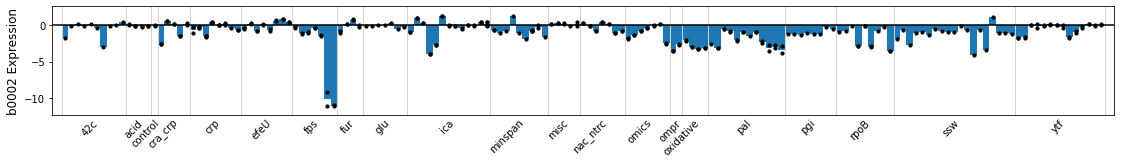

In [3]:
plot_expression(ica_data,'b0002')

<AxesSubplot:ylabel='$thrA$ Expression'>

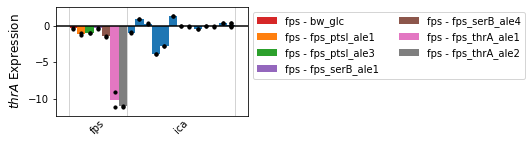

In [4]:
plot_expression(ica_data,'thrA',projects=['ica','fps'],highlight='fps')

## Plot iModulon Activities

<AxesSubplot:ylabel='GlpR iModulon\nActivity'>

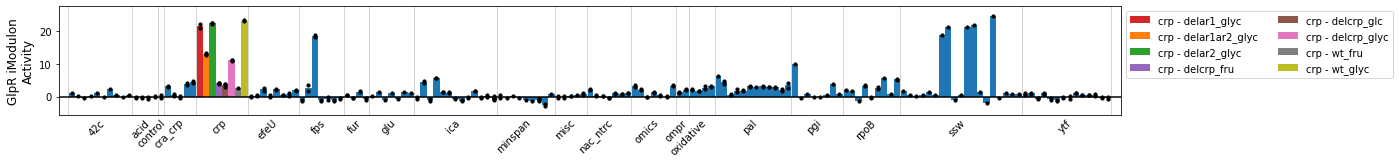

In [5]:
plot_activities(ica_data,'GlpR',highlight='crp')

## Plot sample metadata

<AxesSubplot:ylabel='Growth Rate (1/hr)'>

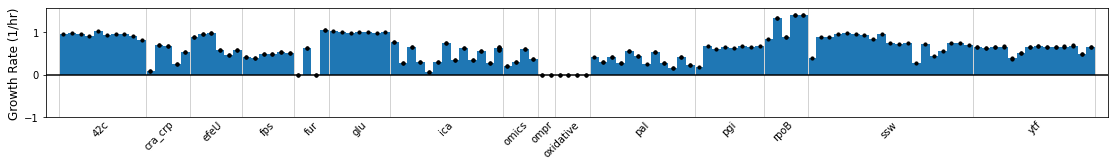

In [6]:
plot_metadata(ica_data,'Growth Rate (1/hr)')

# Scatterplots

Gene expression and iModulon activities can be compared with a scatter plot. Use the `compare_expression` and `compare_activities` functions, respectively. In addition, `compare_values` can be used to compare any compendium-wide value against another, including gene expression, iModulon activity, and sample metadata.

Optional arguments:
* `groups`: Mapping of samples to specific groups
* `show_labels`: Show labels for points. (default: `False`)
* `adjust_labels`: Automatically avoid label overlap
* `fit_metric`: Correlation metric of `'pearson'`,`'spearman'`, or `'r2adj'` (default: `'pearson'`)
* `ax`: Use a pre-existing axis (helpful if you want to manually determine the plot size)

Formatting arguments:
* `ax_font_args`: Arguments for label axes (e.g. `{'fontsize':16'}`) 
* `scatter_args`: Arguments for scatter plot (e.g. `{'s'=10}`)
* `label_font_args`: Arguments for text labels (e.g. `{'fontsize':8}`)
* `legend_args`: Arguments to pass to the legend (e.g. `{'fontsize':12, 'loc':0, 'ncol':2}`)

## Plot gene weights
`plot_gene_weights` will plot an iModulon's gene weights against its genomic position. If the number of genes in the iModulon is fewer than 20, it will also show the gene names (or locus tags, if gene name is unavailable).

<AxesSubplot:xlabel='Gene Start', ylabel='GlpR Gene Weight'>

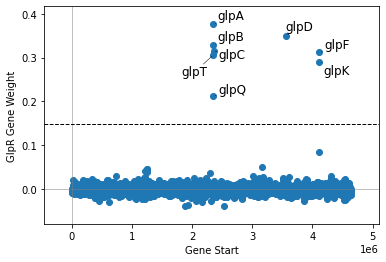

In [7]:
plot_gene_weights(ica_data,'GlpR')

If there are more than 20 genes, gene names will not be shown by default.

<AxesSubplot:xlabel='Gene Start', ylabel='Fnr Gene Weight'>

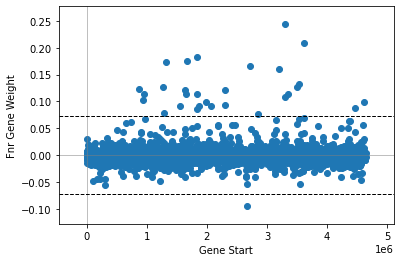

In [8]:
plot_gene_weights(ica_data,'Fnr')

Use `show_labels=True` show gene labels. It is advisable to turn of auto-adjustment of gene labels (`adjust_labels=False`), as this may take a while with many genes.

<AxesSubplot:xlabel='Gene Start', ylabel='Fnr Gene Weight'>

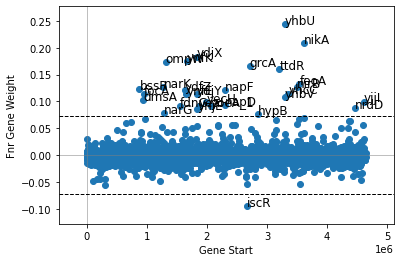

In [9]:
plot_gene_weights(ica_data,'Fnr',show_labels=True,adjust_labels=False)

## Compare two iModulon activities

In [10]:
groups = {'minspan__wt_glc_anaero__1':'Anaerobic',
          'minspan__wt_glc_anaero__2':'Anaerobic'}

<AxesSubplot:xlabel='Fnr iModulon Activity', ylabel='ArcA-1 iModulon Activity'>

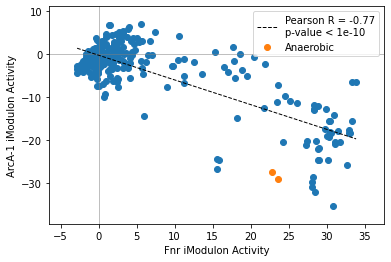

In [11]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups)

## Compare two gene expression profiles

<AxesSubplot:xlabel='$arcA$ Expression', ylabel='$fnr$ Expression'>

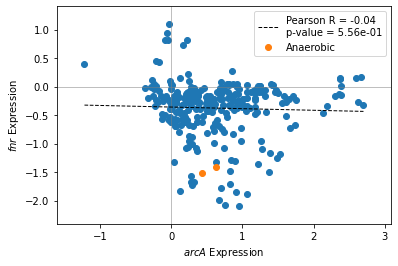

In [12]:
compare_expression(ica_data,'arcA','fnr',groups=groups)

## Compare iModulon gene weights

<AxesSubplot:xlabel='CysB Gene Weight', ylabel='Cbl+CysB Gene Weight'>

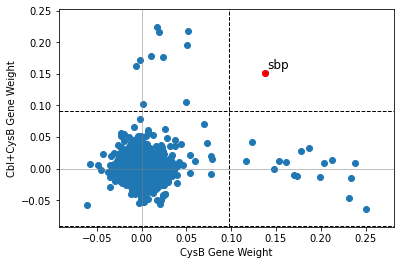

In [13]:
compare_gene_weights(ica_data,'CysB','Cbl+CysB')

## Compare iModulon gene weights across organisms

In [14]:
s_acid = load_json_model('../example_data/modulome_example/saci.json')

In [15]:
m_binarized = pd.DataFrame().reindex_like(s_acid.M)

<AxesSubplot:xlabel='CysB Gene Weight', ylabel='1 Gene Weight'>

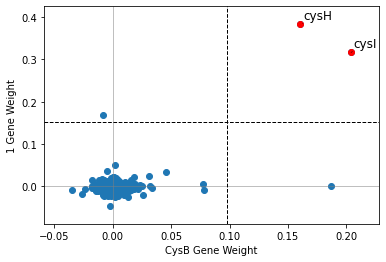

In [16]:
compare_gene_weights(ica_data,'CysB',
                     ica_data2 = s_acid, imodulon2=1, 
                     ortho_file='../example_data/example_bbh.csv')

Use `use_org1_names` to switch which organism's names are shown

<AxesSubplot:xlabel='CysB Gene Weight', ylabel='1 Gene Weight'>

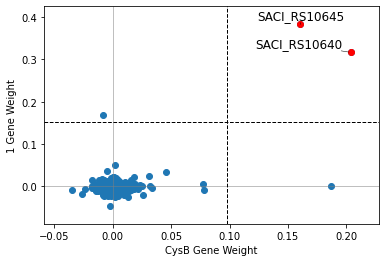

In [17]:
compare_gene_weights(ica_data,'CysB',
                     ica_data2 = s_acid, imodulon2=1,  
                     ortho_file='../example_data/example_bbh.csv',
                     use_org1_names=False)

# Regulon plots
iModulon gene weights can be visualized in a histogram. If you wish to highlight genes in a regulon, it can be visualized either as overlapping bars, or side-by-side bars.

<AxesSubplot:xlabel='Fur-1 Gene Weight', ylabel='Number of Genes'>

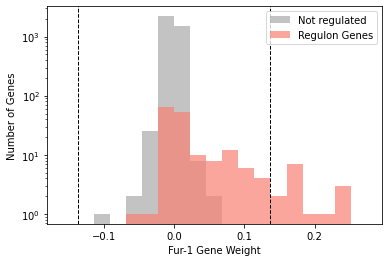

In [18]:
plot_regulon_histogram(ica_data,'Fur-1','fur')

<AxesSubplot:xlabel='Fur-1 Gene Weight', ylabel='Number of Genes'>

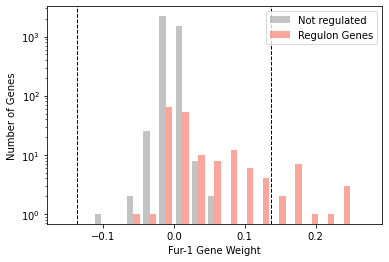

In [19]:
plot_regulon_histogram(ica_data,'Fur-1','fur',kind='side')

# Activity Clustering

The iModulon activites in the A matrix can be clustered based on correlation between their activities across conditions in the compendium.

Use the `cluster_activities` function to prepare a clustermap; the minimal input is simply your IcaData object.

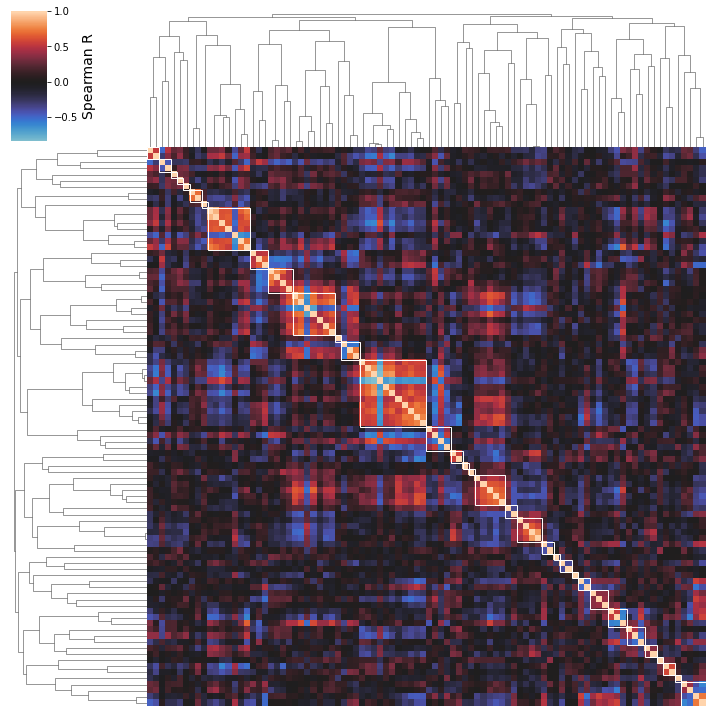

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

In [20]:
cluster_activities(ica_data)

## Automatic Distance Thresholding

Agglomerative (hierarchical) clustering is used under the hood. Thus, a distance threshold for defining "flat" clusters from the hierarchical structure must be determined. By default, this distance threshold is automagically calculated using a sensitivity analysis. 

Different distance thresholds (this value is between 0 and 1) are tried, and the resulting clustering is assessed using a silhouette score (a measure of how separate the clusters are). The distance threshold yielding the maximum silhouette score is automatically chosen.

To see the result of this sensitivity analysis, use the `show_thresholding` option.

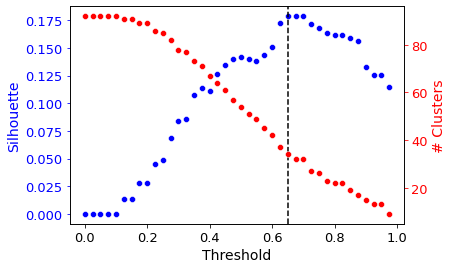

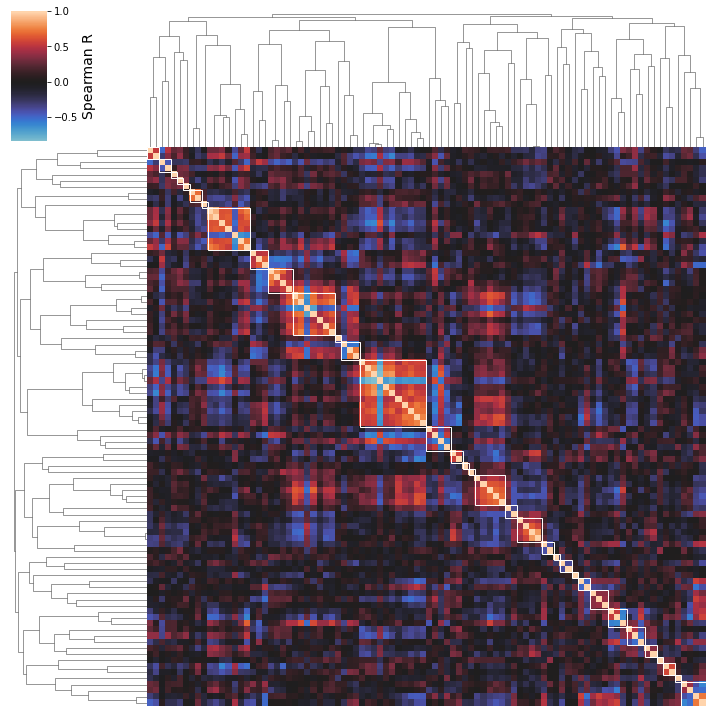

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

In [22]:
cluster_activities(ica_data, show_thresholding=True)

## Manual Distance Threshold

You may also determine that you're interested in manually varying the distance threshold to see what happens to the iModulon clusters. Setting this threshold manually (with the `distance_threshold` option) will override the automatic thresholding shown above. 

Note: `distance_threshold` must be set to a value between 0 and 1; larger values will generally yield smaller numbers of larger clusters, as shown in the thresholding plot above.

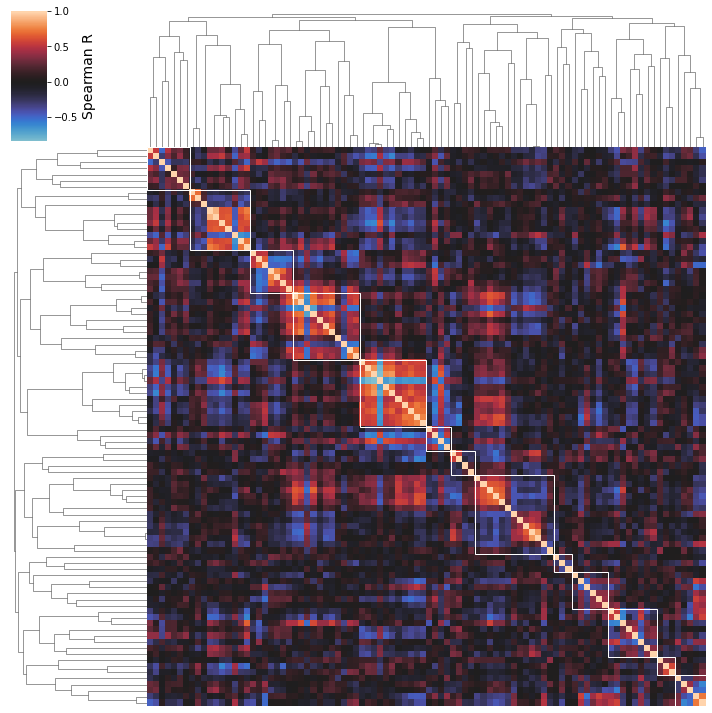

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.95, linkage='complete',
                         n_clusters=None)]

In [23]:
cluster_activities(ica_data, distance_threshold=0.95)

## Displaying Best Clusters

The above clustermaps do not allow you to see which iModulons are actually being clustered together; use the `show_best_clusters` option to call out an additional plot that shows such clusters. 

By default, the clusters whose individual silhouette scores are greater than the mean silhouette score (indicating their separation from the other clusters is above-average) will be shown.

The cluster numbers come from the scikit-learn `AgglomerativeClustering` estimator that actually performs the clustering; these labels don't have any special significance and are just unique identifiers for each cluster. You can also access an iModulon-index-matched list of these labels by accessing the `labels_` attribute of the `AgglomerativeClustering` object (which is returned by `cluster_activities`).

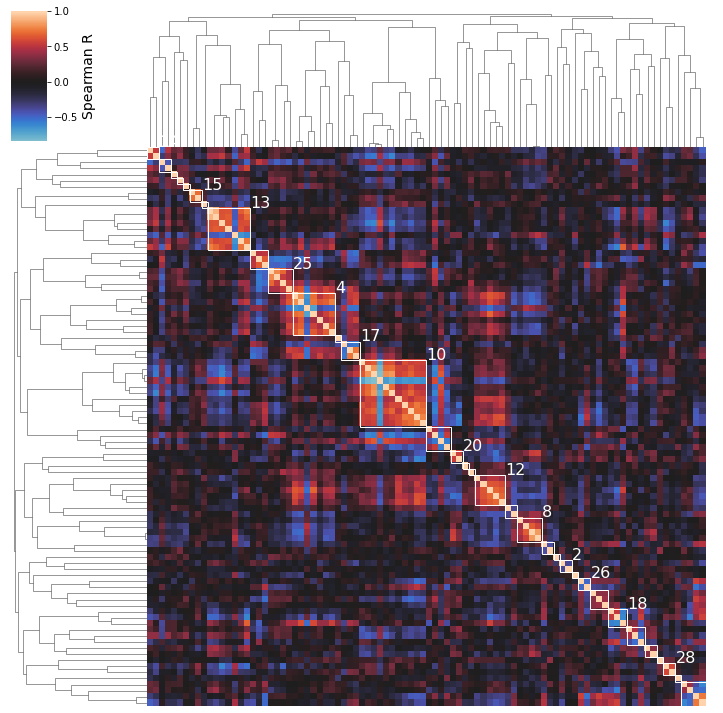

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

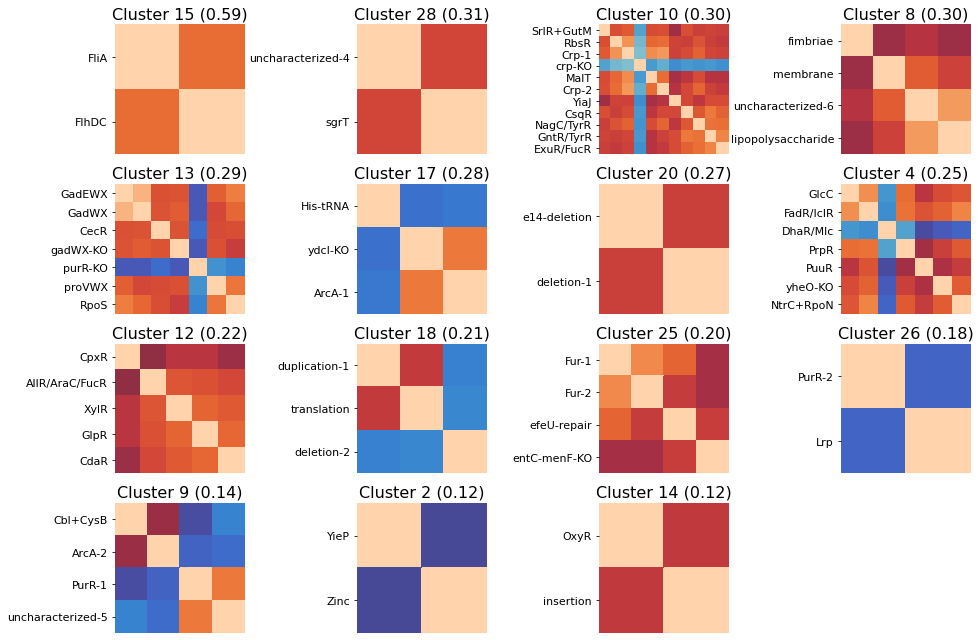

In [24]:
cluster_activities(ica_data, show_best_clusters=True)

So we can see here that the clustering method does seem to capture some biologically-relevant groups of iModulons: Cluster 15 contains 2 flagella regulators, Cluster 8 is membrane-related, Cluster 13 is stress-related, Cluster 25 is iron-related, Cluster 12 is carbon metabolism related, etc.

NOTE: the parenthesized numbers next to the cluster names are the clusters' silhouette scores (a 0 to 1 measure of a cluster's separation from the pack).

Perhaps you're only interested in seeing a specific number of the top clusters; use the `n_best_clusters` argument to specify this preference:

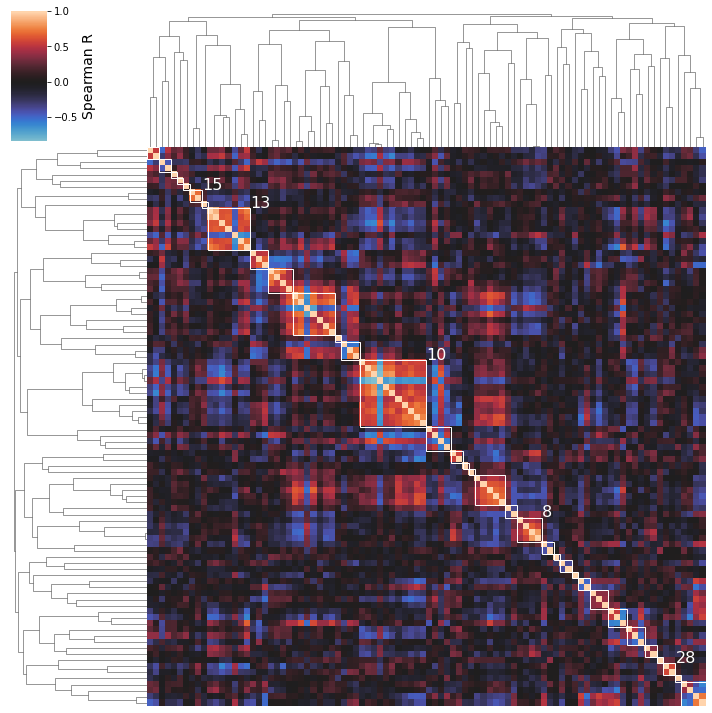

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

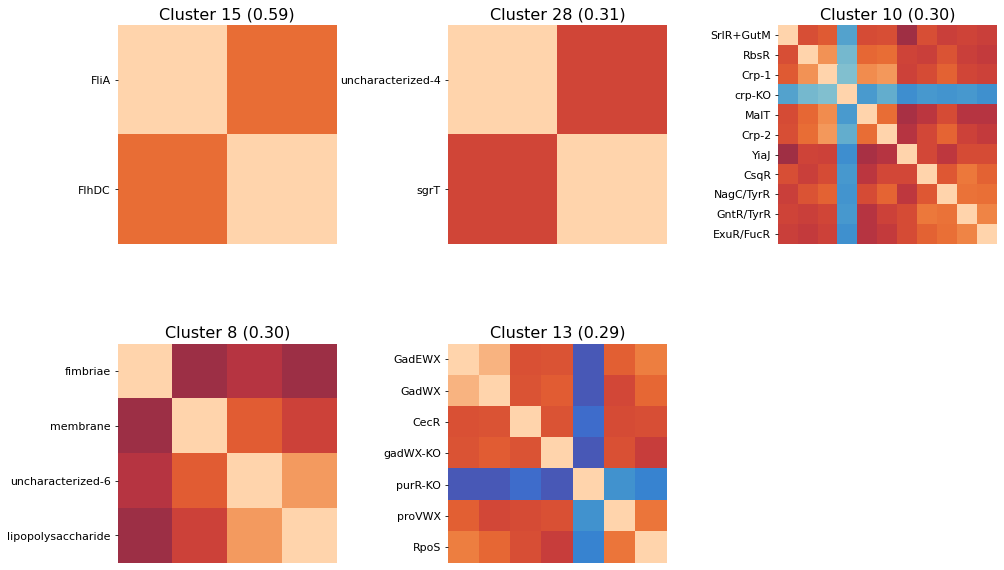

In [25]:
cluster_activities(ica_data, show_best_clusters=True, n_best_clusters=5)

## Naming Clusters

After performing an initial clustering and manually mapping knowledge onto your best clusters, you may decide on a new, more descriptive name for some of your clusters. To generate pretty figures that use these names instead of the soulless integer IDs, use the `cluster_names` option to map the integer IDs to names. You don't have to rename all clusters. 

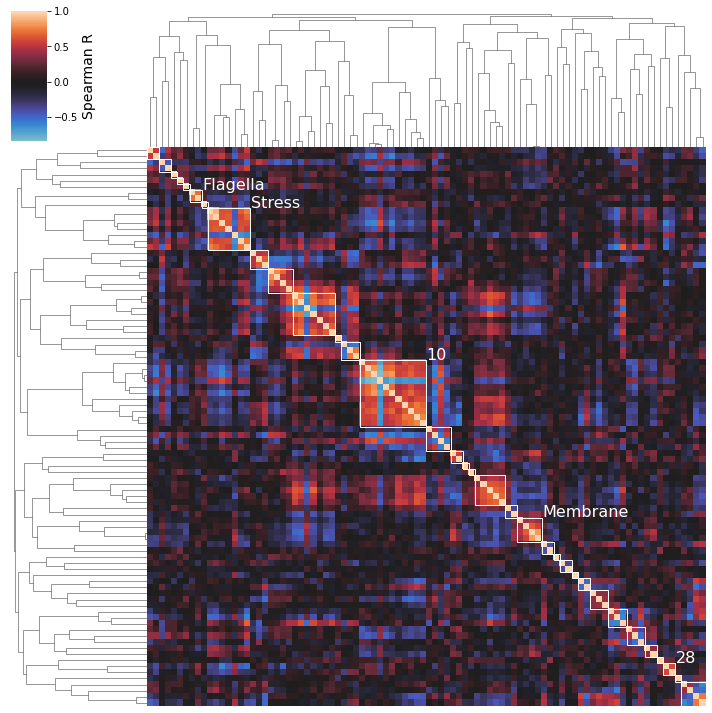

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

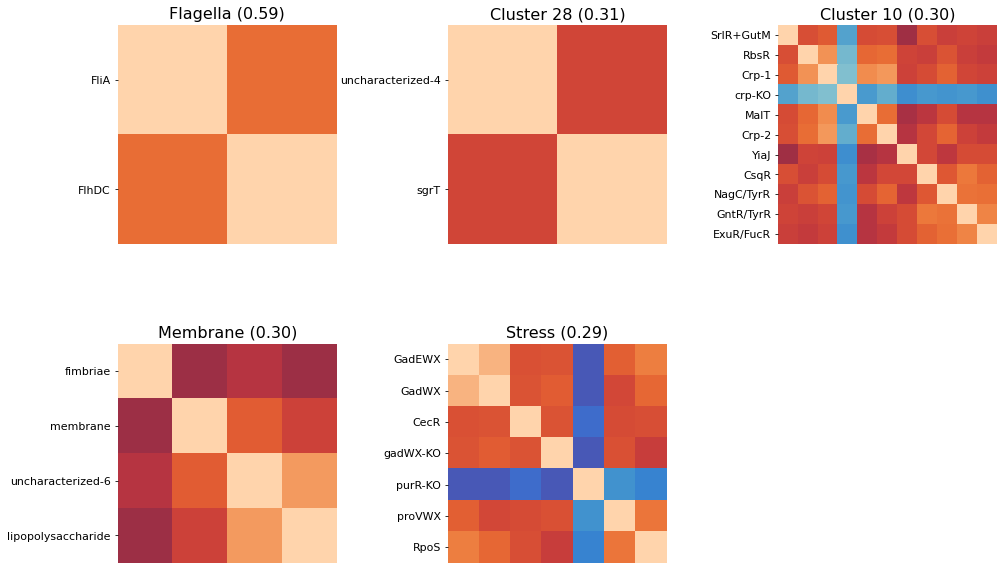

In [26]:
cluster_activities(
    ica_data, show_best_clusters=True, n_best_clusters=5,
    cluster_names={15: 'Flagella', 8: 'Membrane', 13: 'Stress'}
)

## DIMCA

Differential iModulon Cluster Activity (DIMCA) analysis, a sister method to the well-used differential iModulon activity (DIMA) analysis, allows you to compare all iModulon activities between 2 or more conditions. 

`cluster_activities` itself has the capability to perform DIMCA analyses, exposing a series of `dimca_`-prefixed arguments that correspond with the arguments to `plot_dima` (which is in fact used under the hood). 

For DIMCA, a "cluster activity" will be calculated for each of your best clusters (however many you ask for) and then plotted between your 2 conditions, instead of that cluster's constituent iModulons. In this way, a DIMA plot can be rendered even simpler.

Cluster activities are simply the averages of the activities of the constituent iModulons, EXCEPT that for iModulons that are generally anti-correlated with the others in a cluster (see purR-KO from the above plot, for example), the sign of the activities is first switched.

<AxesSubplot:xlabel='fur:wt_dpd', ylabel='fur:wt_fe'>

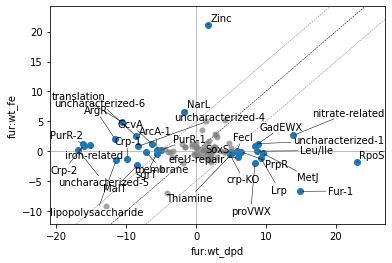

In [30]:
plot_dima(ica_data, 'fur:wt_dpd', 'fur:wt_fe')

This DIMA plot is fairly busy; we can use DIMCA to reduce the number of points even further:

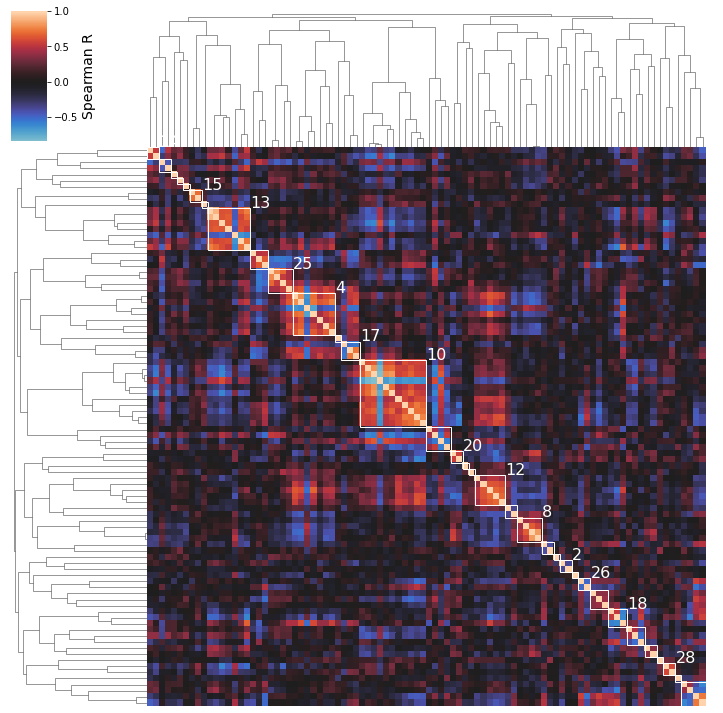

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None),
 <AxesSubplot:xlabel='fur:wt_dpd', ylabel='fur:wt_fe'>]

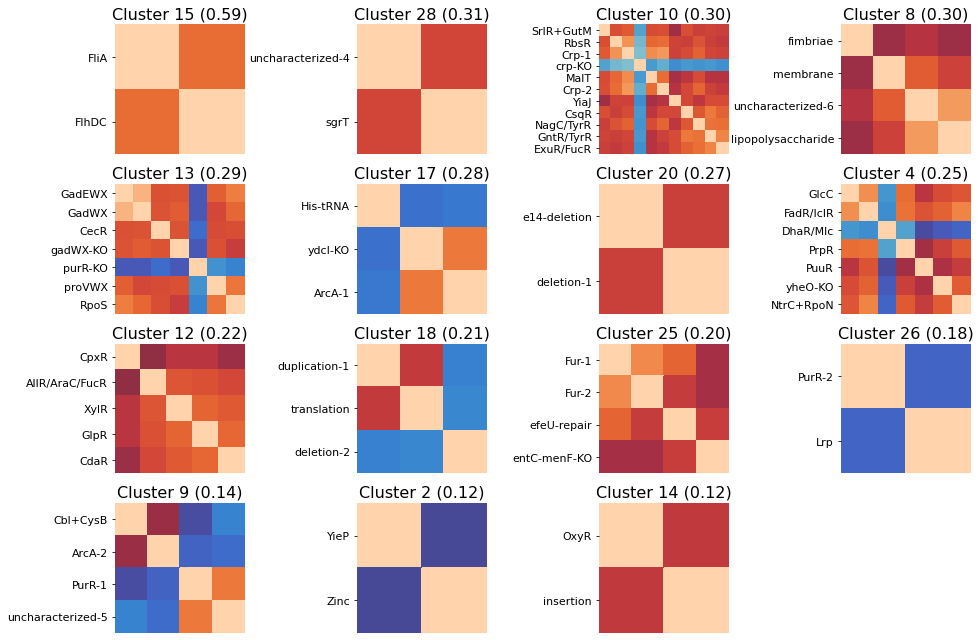

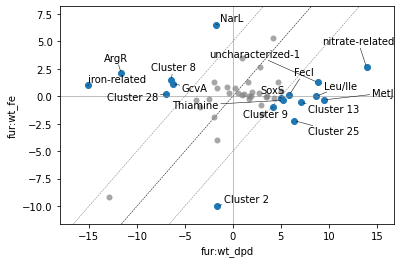

In [31]:
cluster_activities(ica_data, show_best_clusters=True, dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe')

Thus, we have a somewhat simpler picture of this comparison. We can increase the number of best clusters we ask for to yield only cluster points; be careful with this though, as some of the worse-scoring clusters are actually "singleton" clusters with just a single iModulon in them (for these iModulons' activities are generally uncorrelated with the other iModulons in the dataset).

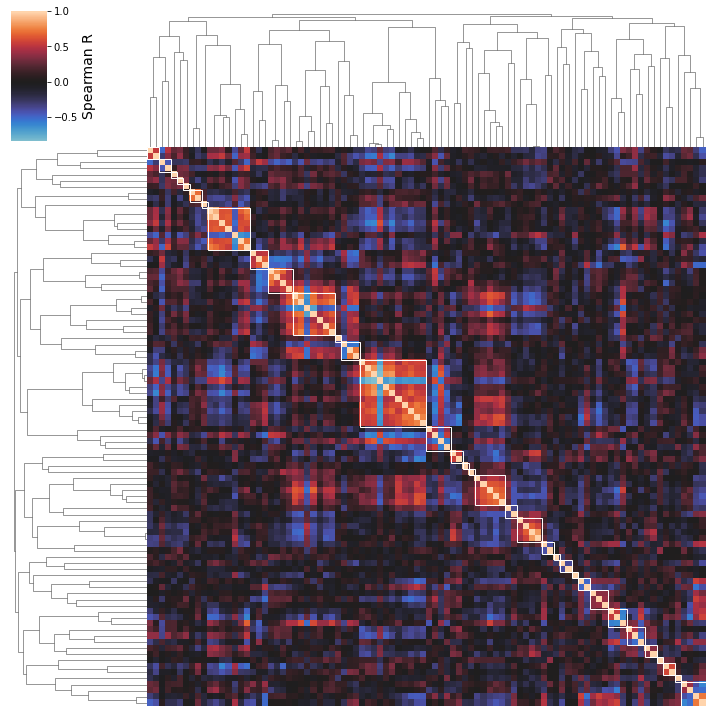

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None),
 <AxesSubplot:xlabel='fur:wt_dpd', ylabel='fur:wt_fe'>]

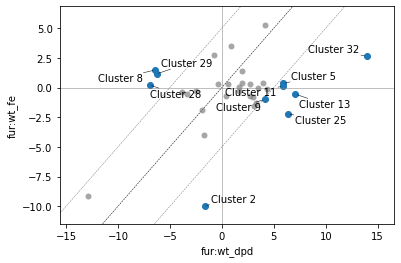

In [32]:
cluster_activities(ica_data, n_best_clusters=50, dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe')

And as before, if we name clusters, those names will propagate to the DIMCA plot (and DIMCA table if requested):

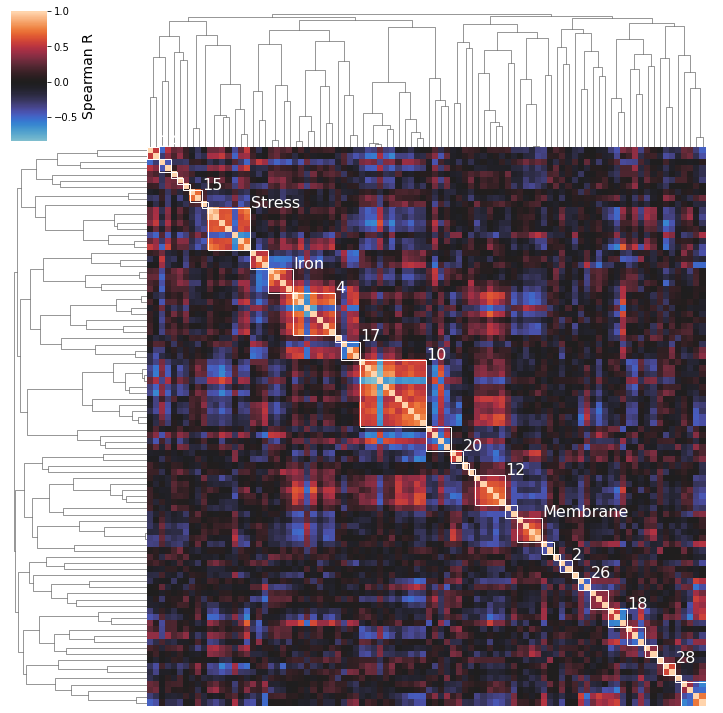

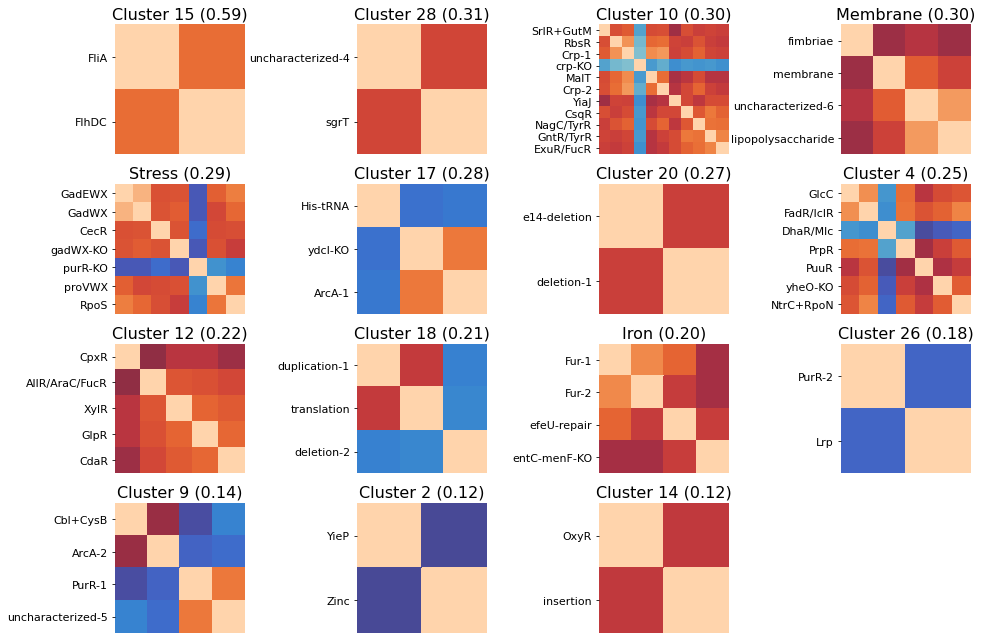

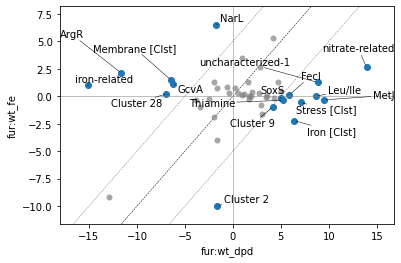

In [35]:
cluster_obj, dimca_ax, table = cluster_activities(
    ica_data, show_best_clusters=True,
    cluster_names={25: 'Iron', 13: 'Stress', 8: 'Membrane'},
    dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe', dimca_table=True
)

In [37]:
table

,difference,pvalue,qvalue,0,1
iron-related,16.153595,0.000168,0.001971,-15.149284,1.004311
ArgR,13.753341,0.002044,0.005877,-11.636817,2.116524
NarL,8.227232,0.002884,0.007045,-1.706729,6.520503
Membrane [Clst],7.906679,0.001441,0.004514,-6.433855,1.472824
GcvA,7.412801,0.000035,0.000823,-6.265427,1.147374
Cluster 28,7.156066,0.000250,0.002347,-6.943347,0.212719
Cluster 9,-5.126362,0.000456,0.002925,4.132141,-0.994221
SoxS,-5.226992,0.000665,0.003127,5.043639,-0.183353
Thiamine,-5.558917,0.003923,0.007682,5.193298,-0.365619
FecI,-5.760403,0.001402,0.004514,5.871660,0.111257


Note that '[Clst]' is added to cluster names in the DIMCA plot to avoid confusion with unclustered iModulons.

# Coming soon
1. Regulon venn diagrams